Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0                                               text  class
0       51297  get crush guy definitely way old laugh literal...      0
1       24705   go to july 2018i hope 8 month enough change mind      1
2      185969  want live anymore 23 right thinking end life p...      1
3      201675  every time get period want kill already depres...      1
4       52701  story incomplete similar story op case dad spe...      1


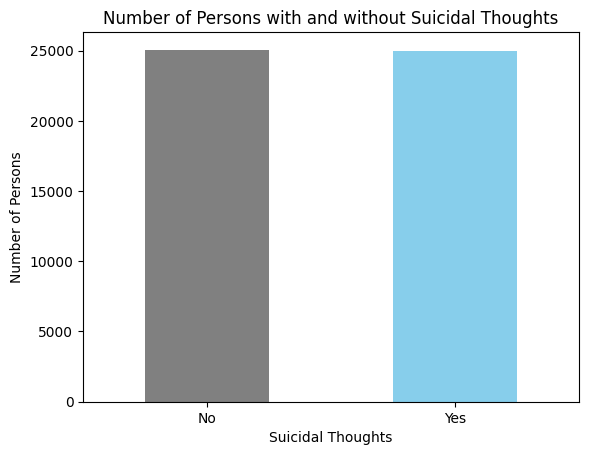

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/draft_50000.csv')

# Check the first few rows to understand the structure
print(df.head())

# Count the occurrences of each category in the 'class' column
counts = df['class'].value_counts()

# Plot the bar graph
counts.plot(kind='bar', color=['grey', 'skyblue'])

# Add labels and title
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Number of Persons')
plt.title('Number of Persons with and without Suicidal Thoughts')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Show the plot
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy (TF-IDF): 0.90
Confusion Matrix (TF-IDF):
[[4437  498]
 [ 470 4593]]
Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4935
           1       0.90      0.91      0.90      5063

    accuracy                           0.90      9998
   macro avg       0.90      0.90      0.90      9998
weighted avg       0.90      0.90      0.90      9998



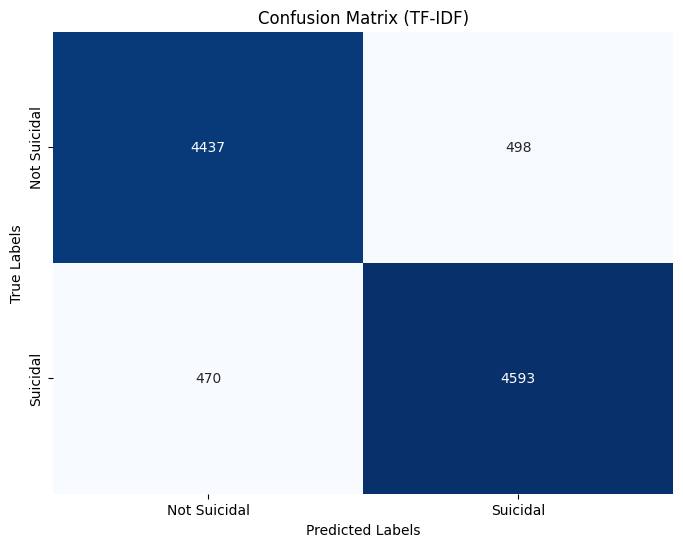

Accuracy (Word2Vec): 0.91
Confusion Matrix (Word2Vec):
[[4516  419]
 [ 507 4556]]
Classification Report (Word2Vec):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4935
           1       0.92      0.90      0.91      5063

    accuracy                           0.91      9998
   macro avg       0.91      0.91      0.91      9998
weighted avg       0.91      0.91      0.91      9998



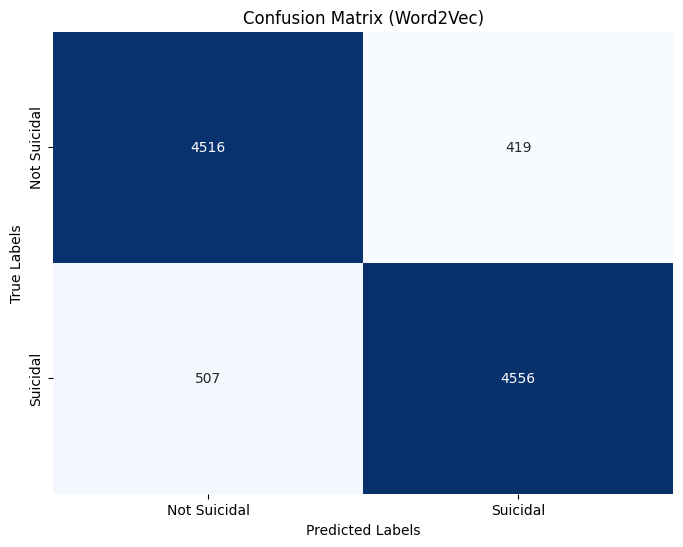

Accuracy (CountVectorizer): 0.89
Confusion Matrix (CountVectorizer):
[[4257  678]
 [ 422 4641]]
Classification Report (CountVectorizer):
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      4935
           1       0.87      0.92      0.89      5063

    accuracy                           0.89      9998
   macro avg       0.89      0.89      0.89      9998
weighted avg       0.89      0.89      0.89      9998



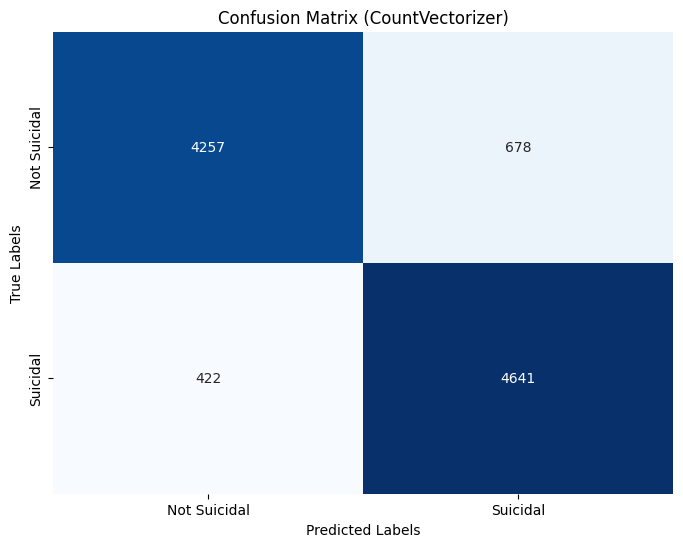

Accuracy (GloVE): 0.87
Confusion Matrix (GloVE):
[[4489  446]
 [ 838 4225]]
Classification Report (GloVE):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4935
           1       0.90      0.83      0.87      5063

    accuracy                           0.87      9998
   macro avg       0.87      0.87      0.87      9998
weighted avg       0.87      0.87      0.87      9998



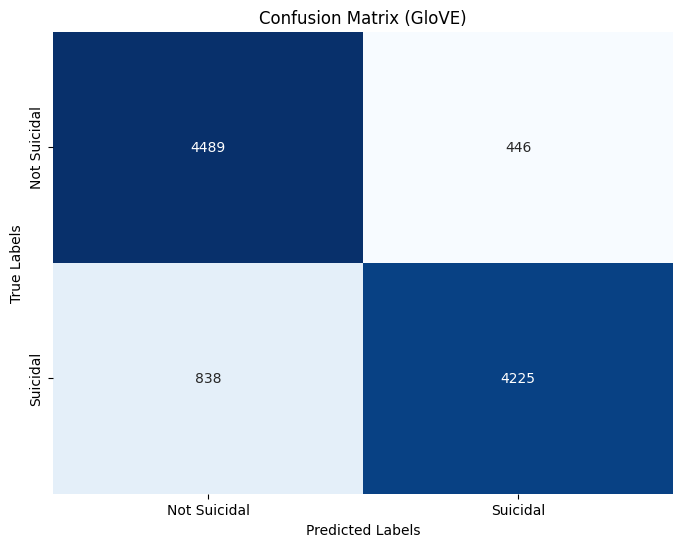

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from gensim.models import Word2Vec
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/draft_50000.csv')

'''# Check the first few rows to understand the structure
print(df.head())

# Count the occurrences of each category in the 'class' column
counts = df['class'].value_counts()

# Plot the bar graph
counts.plot(kind='bar', color=['grey', 'skyblue'])

# Add labels and title
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Number of Persons')
plt.title('Number of Persons with and without Suicidal Thoughts')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Show the plot
plt.show()'''

# Text preprocessing
df['text'] = df['text'].str.lower().str.replace('[^\w\s]', '', regex=True)
df.dropna(subset=['text', 'class'], inplace=True)

# Random Forest with TF-IDF
# Step 1: Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df['text'])
y = df['class']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
model_tfidf.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_tfidf = model_tfidf.predict(X_test)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Accuracy (TF-IDF): {accuracy_tfidf:.2f}')
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print('Confusion Matrix (TF-IDF):')
print(conf_matrix_tfidf)
class_report_tfidf = classification_report(y_test, y_pred_tfidf)
print('Classification Report (TF-IDF):')
print(class_report_tfidf)

# Plot confusion matrix for TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Suicidal', 'Suicidal'], yticklabels=['Not Suicidal', 'Suicidal'])
plt.title('Confusion Matrix (TF-IDF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Random Forest with Word2Vec
# Step 1: Train Word2Vec model
sentences = [text.split() for text in df['text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Step 2: Convert text to Word2Vec embeddings
X_w2v = []
for sentence in sentences:
    sentence_vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    if sentence_vectors:
        X_w2v.append(np.mean(sentence_vectors, axis=0))
    else:
        X_w2v.append(np.zeros(word2vec_model.vector_size))
X_w2v = np.array(X_w2v)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest model
model_w2v = RandomForestClassifier(n_estimators=100, random_state=42)
model_w2v.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_w2v = model_w2v.predict(X_test)
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)
print(f'Accuracy (Word2Vec): {accuracy_w2v:.2f}')
conf_matrix_w2v = confusion_matrix(y_test, y_pred_w2v)
print('Confusion Matrix (Word2Vec):')
print(conf_matrix_w2v)
class_report_w2v = classification_report(y_test, y_pred_w2v)
print('Classification Report (Word2Vec):')
print(class_report_w2v)

# Plot confusion matrix for Word2Vec
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_w2v, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Suicidal', 'Suicidal'], yticklabels=['Not Suicidal', 'Suicidal'])
plt.title('Confusion Matrix (Word2Vec)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Random Forest with CountVectorizer
# Step 1: Convert the text data into CountVector features
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(df['text'])

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
model_count = RandomForestClassifier(n_estimators=100, random_state=42)
model_count.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_count = model_count.predict(X_test)
accuracy_count = accuracy_score(y_test, y_pred_count)
print(f'Accuracy (CountVectorizer): {accuracy_count:.2f}')
conf_matrix_count = confusion_matrix(y_test, y_pred_count)
print('Confusion Matrix (CountVectorizer):')
print(conf_matrix_count)
class_report_count = classification_report(y_test, y_pred_count)
print('Classification Report (CountVectorizer):')
print(class_report_count)

# Plot confusion matrix for CountVectorizer
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Suicidal', 'Suicidal'], yticklabels=['Not Suicidal', 'Suicidal'])
plt.title('Confusion Matrix (CountVectorizer)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Random Forest with GloVE
# Step 1: Load GloVE embeddings

glove_file = '/content/drive/MyDrive/NLP PROJECT/glove.6B-20240619T062559Z-002/glove.6B/glove.6B.200d.txt'
glove_embeddings = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Step 2: Convert text to GloVE embeddings
max_length = 100  

X_glove = []
for sentence in sentences:
    sentence_vectors = [glove_embeddings[word] for word in sentence if word in glove_embeddings]
    if sentence_vectors:
        sentence_vector = np.mean(sentence_vectors, axis=0)
    else:
        sentence_vector = np.zeros(max_length) 

    # pad the sentence vector with zeros to reach the maximum length
    sentence_vector = list(sentence_vector)
    sentence_vector += [0.0] * (max_length - len(sentence_vector))
    sentence_vector = sentence_vector[:max_length]  

    X_glove.append(sentence_vector)

X_glove = np.array(X_glove)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest model
model_glove = RandomForestClassifier(n_estimators=100, random_state=42)
model_glove.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_glove = model_glove.predict(X_test)
accuracy_glove = accuracy_score(y_test, y_pred_glove)
print(f'Accuracy (GloVE): {accuracy_glove:.2f}')
conf_matrix_glove = confusion_matrix(y_test, y_pred_glove)
print('Confusion Matrix (GloVE):')
print(conf_matrix_glove)
class_report_glove = classification_report(y_test, y_pred_glove)
print('Classification Report (GloVE):')
print(class_report_glove)

# Plot confusion matrix for GloVE
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_glove, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Suicidal', 'Suicidal'], yticklabels=['Not Suicidal', 'Suicidal'])
plt.title('Confusion Matrix (GloVE)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
